

# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

1-'PatientId' the id given for te patient.

2-'AppointmentID' the id given for the appointment.

3-'Gender' male or female.

4-‘ScheduledDay’ The day of the actual appointment, when they have to visit the doctor.

5-'AppointmentDay' The day someone registered the appointment, this is before appointment of course.

6-'Age' How old is the patient.

7-‘Neighborhood’ indicates the location of the hospital.

8-‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

9-'Hipertension' Refers to a patient diagnosed with hypertension. '1' means yes while '0' means no.

10-'Diabetes' Refers to a patient diagnosed with Diabetes. '1' means yes while '0' means no.

11-'Alcoholism' Refers to a patient found to be an alcoholic. '1' shows that patient is an alcoholic while '0' shows that patient is not an alcoholic.

12-'Handcap' Is the patient handicapped.

13-'SMS_received' This means either 1 or more messages were sent to the patient concerning the appointment. '1' means one sms was sent. '0' means sms was not sent.

14-'No-show' it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
 


### Question(s) for Analysis
**Questions planned on exploring over the course of the report:**

1- What is the number and ratio of people attending the appointments?

2- Is age a factor to have a scholarship?

3- What is the relation between Age and Hipertension?

4- What is the relation between Age and Diabetes?

5- Is age a factor that effects attending the appointments?

6- Who attends appointments more male or female?

7- What is the rate of people attending appointments for each disease?

8- Is Alcoholism a factor that effects attending the appointments?

9- Is  SMS a factor that effects attending the appointments?

10- What is Appointment show rate by each level of Handcap and who is the lowestto attend the appointment?

11-What is percantage of patients attended the appointment at the same day they booked it?

12- What is percantage of patients attended the appointment at diffrent day that they booked it?

13- Which day of the week is the most/least day that have appointments on it?

14- Which day of the week is the most/least day that patients have no show appointments on it?

15- Which Neighbourhood is the most/least that patients have appointments in it?



In [1]:
#packages needed for the project
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Load data 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')



### Data Cleaning
 

In [4]:
#Exploring data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Exploring data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#Checking null values
df.isnull().sum().sum()

0

Their is no null values.

In [7]:
#checking duplicates
df.duplicated().sum()

0

Their is no duplicate values

In [8]:
#changing data type of 'ScheduledDay' and 'AppointmentDay' from str to date and 'Age' as int
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['Age'] = df['Age'].astype(int)

In [9]:
# drop the columns that will not be used in the analysis 'PatientId' and 'AppointmentID'
df.drop('AppointmentID', inplace = True , axis =1)
df.drop('PatientId', inplace = True , axis =1)


In [10]:
#Confirming changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


In [11]:
#viewing values to make sure it's logical
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
# since age have value -1 it should be remevoed
df.drop(df.loc[df['Age']==-1].index, inplace=True)
df.shape

(110526, 12)

In [13]:
#change No-show to int for being easier for analysis
# no-show columns rename to show , 'yes' = showed-up
df.rename(columns={'No-show':'showed'}, inplace=True)
df['showed'] = df['showed'].apply(lambda x: 1 if x=='No' else 0 )

        

In [14]:
#confirm canges
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns, UTC]
AppointmentDay    110526 non-null datetime64[ns, UTC]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
showed            110526 non-null int64
dtypes: datetime64[ns, UTC](2), int64(8), object(2)
memory usage: 11.0+ MB


In [15]:
#extract day and month from ScheduledDay to be used for analysis
df['Day_of_week']=df['ScheduledDay'].dt.day_name()
df['month'] = pd.DatetimeIndex(df['ScheduledDay']).month

In [16]:
#confirm changes
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed,Day_of_week,month
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,4
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,4
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,4
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday,4
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday,4


In [17]:
#function to calculate the percantage and approximate the value as it will be used several times:
def percentage(numerator,denominator):
    return round((numerator/denominator)*100)

<a id='eda'></a>
## Exploratory Data Analysis



### 1- What is the number and ratio of people attending the appointments?

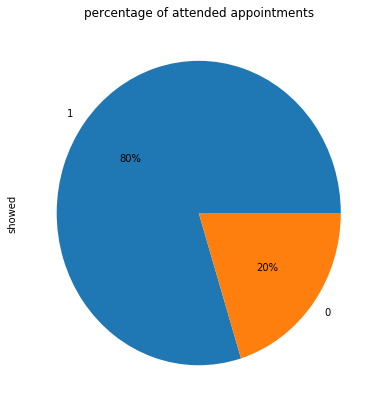

In [18]:
#showing te percentage and values of attending the appointments 
plt.subplot(1,2,1)
df['showed'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(14,7))
plt.title('percentage of attended appointments');


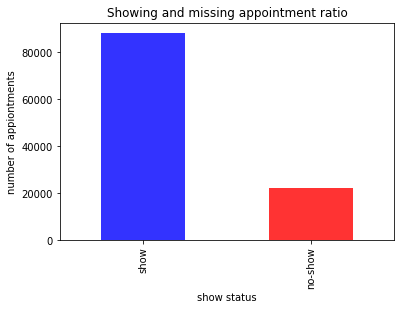

In [19]:
df['showed'].value_counts().plot(kind='bar', color =['blue','red'], alpha=0.8)
plt.title('The number of attended appointments')
plt.xticks([0, 1], ['show', 'no-show'])
plt.xlabel('show status')
plt.ylabel('number of appiontments')
plt.title('Showing and missing appointment ratio');

The previous graphs showed that 80% attended the appointment and 20% didn't attend.

### 2- Is age a factor to have a scholarship?

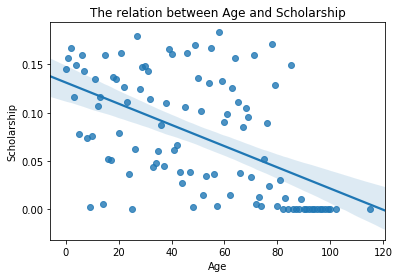

In [20]:
# The relation between Age and Scholarship
Scholarship_mean = df['Scholarship'].groupby(df['Age']).mean()
AGE = df['Age'].unique()
sns.regplot(x = AGE, y = Scholarship_mean)
plt.xlabel('Age')
plt.title('The relation between Age and Scholarship');

There is negiatve Correlation relation between age and scholarship, which means as the age increase the number of people that have scholarship decrease.

### 3- What is the relation between Age and Hipertension?

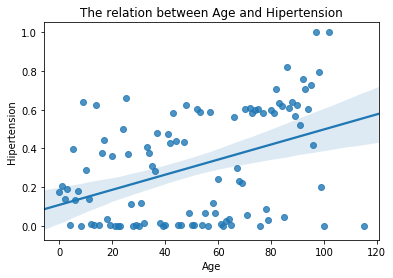

In [21]:
# The relation between Age and Hipertension
Hipertension_mean = df['Hipertension'].groupby(df['Age']).mean()
AGE = df['Age'].unique()
sns.regplot(x = AGE, y = Hipertension_mean)
plt.xlabel('Age')
plt.title('The relation between Age and Hipertension');

There is postive Correlation relation between age and Hipertension, which means as the age increase the number of people that have Hipertension increase.

### 4- What is the relation between Age and Diabetes?

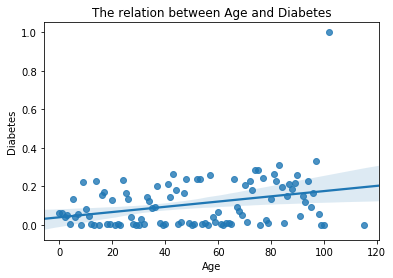

In [22]:
# The relation between Age and Diabetes
Diabetes_mean = df['Diabetes'].groupby(df['Age']).mean()
AGE = df['Age'].unique()
sns.regplot(x = AGE, y = Diabetes_mean)
plt.xlabel('Age')
plt.title('The relation between Age and Diabetes');

There is postive Correlation relation between age and Diabetes, which means as the age increase the number of people that have Diabetes increase.

### 5- Is age a factor that effects attending the appointments?

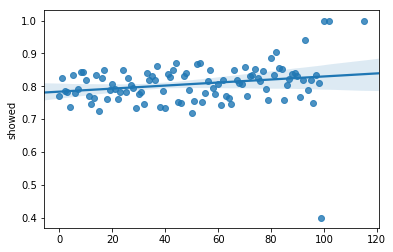

In [23]:
# The relation between Age and attending appointemts
AGE = df['Age'].unique()
showed = df['showed'].groupby(df['Age']).mean()
sns.regplot(x = AGE, y = showed );

We can not say that age is an effective factor in attending the appointments as the carrolation is postive but week.

### 6- Who attends appointments more male or female?

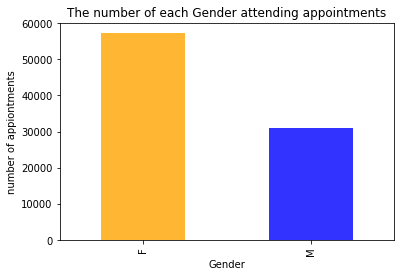

In [24]:
 #the number of male vs female attending the appointments? 
number_of_genders = df['showed'].groupby(df['Gender']).sum()
number_of_genders.plot(kind='bar', color =['orange','blue'], alpha=0.8)
plt.ylabel('number of appiontments')
plt.title('The number of each Gender attending appointments');

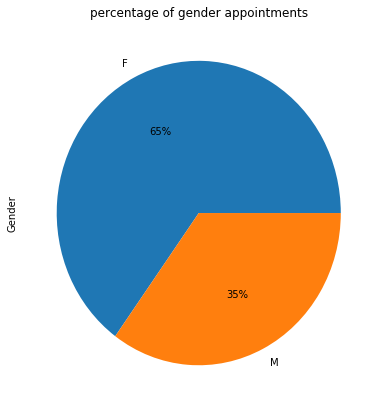

In [25]:
plt.subplot(1,2,1)
df['Gender'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(14,7))
plt.title('percentage of gender appointments');

This showes that females are most likely to attend apointments more than males.

### 7- What is the rate of people attending appointments for each disease?

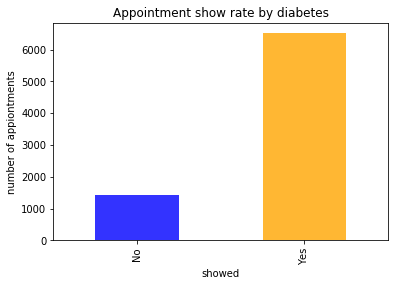

In [26]:
df.groupby('showed')['Diabetes'].sum().plot(kind='bar', alpha=.8, color=['blue', 'orange'])
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('number of appiontments')
plt.title('Appointment show rate by diabetes');

In [27]:
print('The percantage of patients infected by Diabetes and attend the appointments=',round((df.groupby('showed')['Diabetes'].sum()[1]/df.groupby('showed')['Diabetes'].sum().sum())*100),'%')

The percantage of patients infected by Diabetes and attend the appointments= 82 %


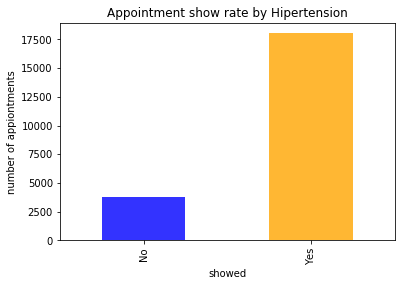

In [28]:
df.groupby('showed')['Hipertension'].sum().plot(kind='bar', alpha=.8, color=['blue', 'orange'])
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('number of appiontments')
plt.title('Appointment show rate by Hipertension');

In [29]:
print('The percantage of patients infected by Hipertension and attend the appointments=',round((df.groupby('showed')['Hipertension'].sum()[1]/df.groupby('showed')['Hipertension'].sum().sum())*100),'%')

The percantage of patients infected by Hipertension and attend the appointments= 83 %


### 8- Is Alcoholism a factor that effects attending the appointments?

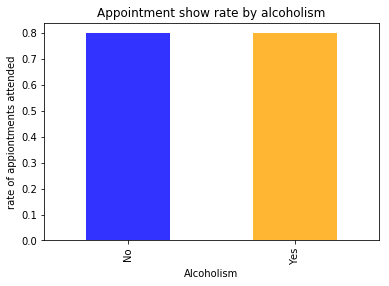

In [30]:
df.groupby('Alcoholism')['showed'].mean().plot(kind='bar', alpha=.8, color=['blue', 'orange'])
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('rate of appiontments attended')
plt.title('Appointment show rate by alcoholism');


In [31]:
print('The percentage of ALcohlosim patients from the total Patients is',percentage(df['Alcoholism'].sum(),df['Alcoholism'].count()),'%','with value equals:',df['Alcoholism'].sum())
print('The total number of ALcohlosim patients who attended the appointment is:',df.query('Alcoholism == 1 and showed==1').Alcoholism.sum())
print('The total number of ALcohlosim patients who did not attended the appointment is:',df.query('Alcoholism == 1 and showed==0').Alcoholism.sum())
print('The probability of ALcohlosim patients to attend appointment is:',percentage(df.query('Alcoholism == 1 and showed==1').Alcoholism.sum(),df['Alcoholism'].sum()),"%")

The percentage of ALcohlosim patients from the total Patients is 3 % with value equals: 3360
The total number of ALcohlosim patients who attended the appointment is: 2683
The total number of ALcohlosim patients who did not attended the appointment is: 677
The probability of ALcohlosim patients to attend appointment is: 80 %


Alcoholism is not an effective factor to detrmine the patient is going to attend or no.

### 9- Is  SMS a factor that effects attending the appointments?

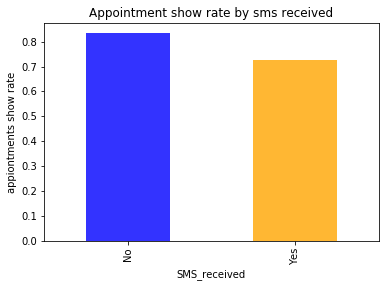

In [32]:
df.groupby('SMS_received')['showed'].mean().plot(kind='bar', alpha=.8, color=['blue', 'orange']);
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('appiontments show rate')
plt.title('Appointment show rate by sms received');

sms is not a factor that effects attending appointments as more than 80% who didn't recieve sms attended the appointments while 70% who recieved sms attended the appointment.

## 10- What is Appointment show rate by each level of Handcap and who is the lowestto attend the appointment?

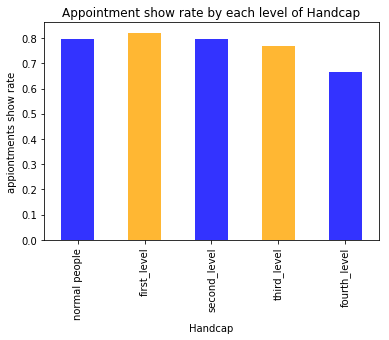

In [33]:
df.groupby('Handcap')['showed'].mean().plot(kind='bar', alpha=.8, color=['blue', 'orange']);
plt.xticks([0, 1, 2, 3, 4], ['normal people','first_level','second_level','third_level','fourth_level'])
plt.ylabel('appiontments show rate')
plt.title('Appointment show rate by each level of Handcap');

people with fourth level of handicap are less likely to attend appointments

## 11-What is percantage of patients attended the appointment at the same day they booked it?
## 12- What is percantage of patients attended the appointment at diffrent day that they booked it?

In [34]:
#extracting date only for AppointmentDay and ScheduledDay and adding it to diffrent data frame to avoid any errors for changing data formate 
k=df
k['ScheduledDay']=k['ScheduledDay'].dt.normalize()
k['AppointmentDay']=k['AppointmentDay'].dt.normalize()
#calculating the number of appointments where the schedualed day equals the booked day
x=(k['ScheduledDay']==k['AppointmentDay']).sum()
#calculating total number of appointments
y=df['showed'].count()
#using function created (percentage) to calculate the percentage of appointments where the schedualed day equals the booked day
z = percentage(x,y)
print('The number of patients attended their appintment at the same day they booked it:',x)
print('the total number of appintments is:',y)
print('The percentage of people who attended their appintment at the same day they booked it:',z,'%')

The number of patients attended their appintment at the same day they booked it: 38562
the total number of appintments is: 110526
The percentage of people who attended their appintment at the same day they booked it: 35 %


In [35]:
# The number of people attended the appintment even if the booked day is not as the same attended day 
y = k[k['showed']==1]
q=(y['ScheduledDay']!=y['AppointmentDay']).sum()
#calculating total number of appointments
t=df['showed'].count()
#using function created (percentage) to calculate the percentage of appointments where the schedualed day not equal the booked day
n= percentage(q,t)
print('The number of people attended the appintment even if the booked day is not as the same attended day:',q)
print('The Percentage of people attended the appintment even if the booked day is not as the same attended day:',n,'%')
#The number of people didn't attended the appintment
x=df[df['showed']==0]
z=(x['ScheduledDay']!=x['AppointmentDay']).sum()
#using function created (percentage) to calculate The percentage of people didn't attended the appintment
m= percentage(z,t)
print("The number of people didn't attended the appintment:",z)
print("The percentage of people didn't attended the appintment:",m,'%')
 
    

The number of people attended the appintment even if the booked day is not as the same attended day: 51437
The Percentage of people attended the appintment even if the booked day is not as the same attended day: 47 %
The number of people didn't attended the appintment: 20527
The percentage of people didn't attended the appintment: 19 %


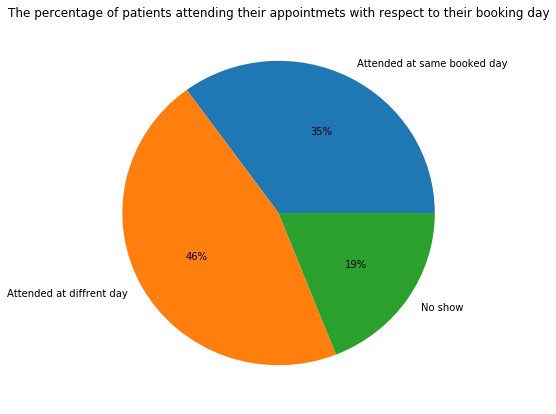

In [36]:
# Creating dataset
v = ['Attended at same booked day', 'Attended at diffrent day', 'No show']
data = [35,46,19]
# Creating plot
fig = plt.figure(figsize=(7,7))
plt.pie(data, labels = v,autopct='%1.0f%%')
plt.title('The percentage of patients attending their appointmets with respect to their booking day')
 
# show plot
plt.show()

## 13- Which day of the week is the most/least day that have appointments on it?

In [37]:
#The percantage of  number of attended appointments per day
x = df.query('showed==1')['Day_of_week'].value_counts()
y = df.query('showed==1')['Day_of_week'].count()
print('The percantage of number of appointments on each day of week =')
print(round((x/y)*100))

The percantage of number of appointments on each day of week =
Tuesday      24.0
Wednesday    22.0
Monday       21.0
Friday       17.0
Thursday     16.0
Saturday      0.0
Name: Day_of_week, dtype: float64


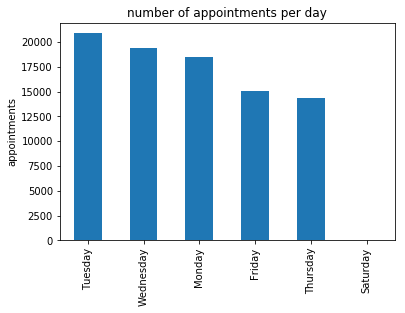

In [38]:
df.query('showed==1')['Day_of_week'].value_counts().plot(kind='bar')
plt.title('number of appointments per day')
plt.ylabel('appointments');

The most day have appointments on is Tueday and the lowest day is Thursday as Saturday is concederd as not working day.

## 14- Which day of the week is the most/least day that patients have no show appointments on it?

In [39]:
df.query('showed==0')['Day_of_week'].value_counts()

Tuesday      5291
Wednesday    4879
Monday       4561
Friday       3887
Thursday     3700
Saturday        1
Name: Day_of_week, dtype: int64

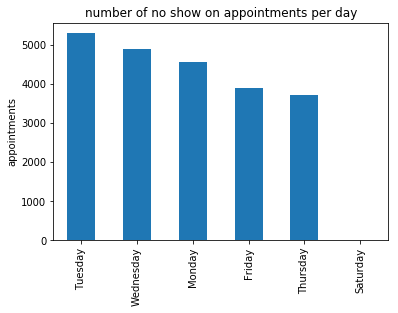

In [40]:
df.query('showed==0')['Day_of_week'].value_counts().plot(kind='bar')
plt.title('number of no show on appointments per day')
plt.ylabel('appointments');

The most day have no show appointments on is Tueday and the lowest day is Thursday as Saturday is concederd as not working day.

## 15- Which Neighbourhood is the most/least that patients have appointments in it?

In [41]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

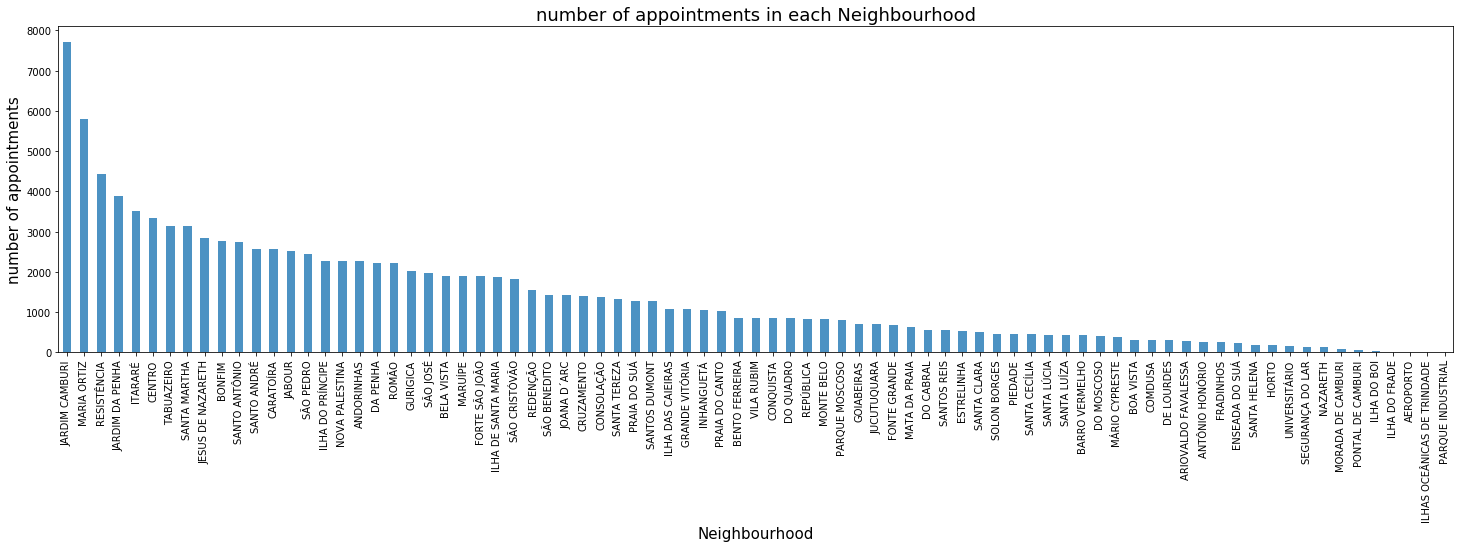

In [42]:
#number of appointments in each Neighbourhood
plt.figure(figsize = (25,6));
df['Neighbourhood'].value_counts().plot(kind='bar', alpha=.8)
plt.ylabel('number of appointments', fontsize=15)
plt.xlabel('Neighbourhood', fontsize=15)
plt.title('number of appointments in each Neighbourhood', fontsize=18);

JARDIM CAMBURI is the most Neighbourhood tat have appointments number, while PARQUE INDUSTRIAL  is the least

<a id='conclusions'></a>
## Conclusions
1- 80% attended the appointment and 20% didn't attend.

2-There is negiatve Correlation relation between age and scholarship, which means as the age increase the number of people that have scholarship decrease.

3-There is postive Correlation relation between age and Hipertension, which means as the age increase the number of people that have Hipertension increase.

4-There is postive Correlation relation between age and Diabetes, which means as the age increase the number of people that have Diabetes increase.

5-We can not say that age is an effective factor in attending the appointments as the carrolation is postive but week.

6-Females are most likely to attend apointments more than males.

7-The percantage of patients infected by Diabetes and attend the appointments= 82 % while
The percantage of patients infected by Hipertension and attend the appointments= 83 %

8-Alcoholism is not an effective factor to detrmine the patient is going to attend or no.

The percentage of ALcohlosim patients from the total Patients is 3 % with value equals: 3360
The total number of ALcohlosim patients who attended the appointment is: 2683
The total number of ALcohlosim patients who did not attended the appointment is: 677
The probability of ALcohlosim patients to attend appointment is: 80 %

9-sms is not a factor that effects attending appointments as more than 80% who didn't recieve sms attended the appointments while 70% who recieved sms attended the appointment.

10-people with fourth level of handicap are less likely to attend appointments

11-The percentage of people who attended their appintment at the same day they booked it: 35 % while
the Percentage of people attended the appintment even if the booked day is not as the same attended day: 46 %

12-The percantage of number of appointments on each day of week :
Tuesday      24%
Wednesday    22%
Monday       21%
Friday       17%
Thursday     16%
Saturday      0%

13-The most day have appointments on is Tueday and the lowest day is Thursday as Saturday is concederd as not working day.

14-The most day have no show appointments on is Tueday and the lowest day is Thursday as Saturday is concederd as not working day.

15-JARDIM CAMBURI is the most Neighbourhood tat have appointments number, while PARQUE INDUSTRIAL  is the least

## Data limitations:

1- No enough monthes to detrmine which month of the year have more traffic on it, so we can supply enough doctors to handle them.

2- Neighberhoud info to determine why some places have high traffic and others have very low traffic.



In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

## References:
1- stackoverflow
2-pandas/numpy/matplotlib documntation
3-simplilearn
4-github